In [2]:
import os,subprocess
workdir='/mnt/Data1/ribli/expression_code/modelling/'
#workdir='/nagyvinyok/adat84/sotejedlik/ribli/expression/modelling'
subprocess.call(['mkdir',workdir])
os.chdir(workdir)

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.style.use('ggplot')
%matplotlib inline

In [3]:
from sklearn import tree
from sklearn import svm
from sklearn import ensemble

In [4]:
import pandas as pd
import numpy as np
import gc

def read_my_data(fname,**kwargs):
    """Load my data from file into np.arrays.
    
    I had to use garbage collector, because pandas read_csv leaves garbage around.
    """
    
    #load data
    print "Loading data... "
    x=pd.read_csv(fname,sep='\t',header=None)
    
    # for some reason not everything is cleaned up
    #when using the pandas read_csv
    gc.collect()
    
    #probe_id=x[0]
    #y=x.iloc[:,-1].values.astype(np.int8)
    #x=x.iloc[:,1:-1].values.astype(np.int8)
    #return probe_id,x,y
    
    return x[0],x.iloc[:,1:-1].values.astype(np.int8),x.iloc[:,-1].values.astype(np.float64)

In [5]:
train_id,train_x,train_y = read_my_data(fname='../prepare_data/naive_feat_vect.csv')

#make labels
train_y=(0.5*(np.sign(train_y-np.median(train_y))+1)).astype(np.int8)

print train_x.shape

Loading data... 
(234044, 600)


In [6]:
import time
def test_sklearn_model(model,train_x,train_y,test_x,test_y):
    start=time.time()
    model=model.fit(train_x,train_y)
    
    train_pred=model.predict(train_x)
    test_pred=model.predict(test_x)
    
    #check errors
    print 'train score:',list((train_pred==train_y)).count(True)/float(len(train_y))
    print 'test score:',list((test_pred==test_y)).count(True)/float(len(test_y))
    print 'It took:',time.time()-start
    
    return train_pred,test_pred

In [8]:
N_train=190000
N_test=40000

rf = ensemble.RandomForestClassifier(n_estimators=100,min_samples_split=10,n_jobs=4)
train_pred,test_pred=test_sklearn_model(
    rf,train_x[:N_train],train_y[:N_train],
    train_x[N_train:N_train+N_test],train_y[N_train:N_train+N_test])

train score: 0.998673684211
test score: 0.553425
It took: 40.9528160095


### Plot results

In [17]:
def plot_feat_imp(train_x,train_y,xmin=-500,xmax=100,**kwargs):
    
    rf = ensemble.RandomForestClassifier(**kwargs)
    model=rf.fit(train_x,train_y)
    
    feature_importance = model.feature_importances_

    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())

    fig,ax=plt.subplots()
    fig.set_size_inches(12,9)
    ax.step(np.arange(len(feature_importance))-500, feature_importance,lw=1,c='dodgerblue')
    ax.axvline(0,lw=2,linestyle='dashed',c='salmon',label='exon start')
    ax.set_ylabel('realtive importance',fontsize=16)
    ax.set_xlabel('pos',fontsize=16)
    ax.set_xlim(xmin,xmax)
    ax.legend(fontsize=16)
    dump=ax.set_title('position importance',fontsize=16)

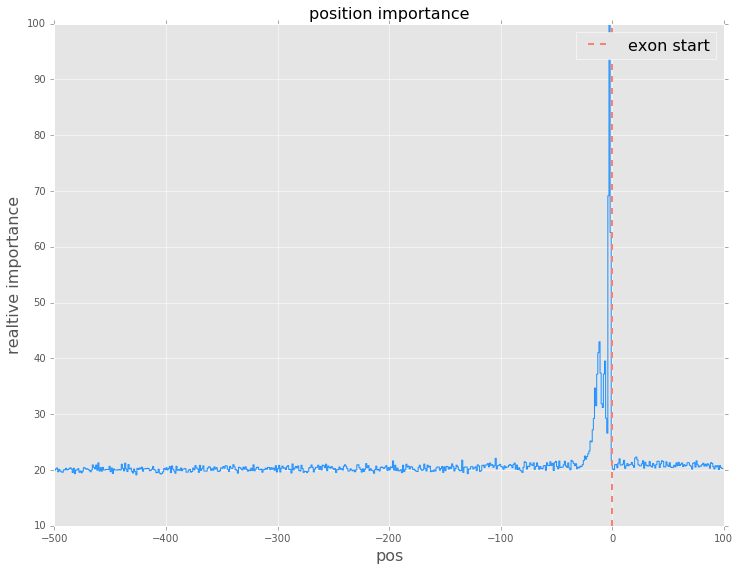

In [13]:
plot_feat_imp(train_x,train_y,xmin=-500,xmax=100,n_estimators=100,min_samples_split=10,n_jobs=4)

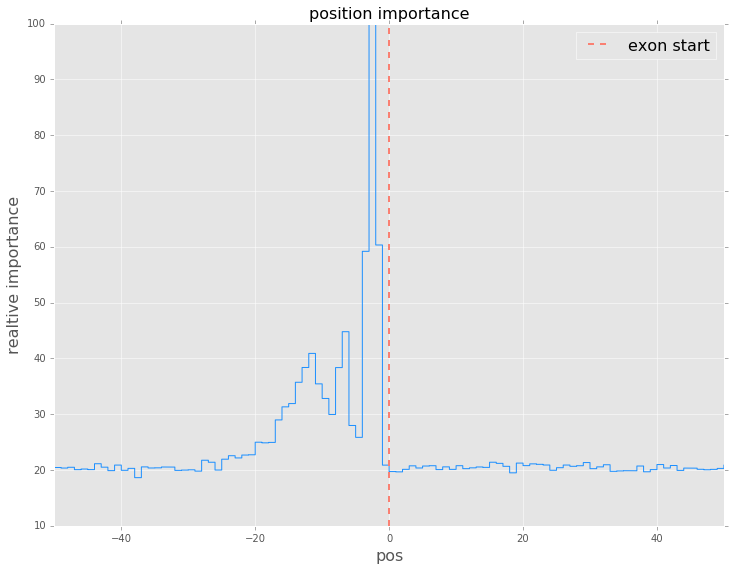

In [20]:
plot_feat_imp(train_x,train_y,xmin=-50,xmax=50,n_estimators=100,min_samples_split=10,n_jobs=4)